# WeatherPy

---

In [1]:
# Dependencies and Setup
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
load_dotenv()

# Retrieve OpenWeather API key
api_key = os.getenv('weather_api_key')

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list

In [3]:
# Set the API base URL
unit = 'metric'
url = "http://api.openweathermap.org/data/2.5/weather?units=" + unit + "&appid=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # 1. https://stackoverflow.com/questions/68694155/getting-the-datetime-text-in-the-openweathermap-api-in-python
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | igarka
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | altai
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | phalodi
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | san pedro de lloc
Processing Record 13 of Set 1 | pimentel
Processing Record 14 of Set 1 | baytown
Processing Record 15 of Set 1 | berdigestyakh
Processing Record 16 of Set 1 | holualoa
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | thinadhoo
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | port-au

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                585
Lat                 585
Lng                 585
Max Temp (C)        585
Humidity (%)        585
Cloudiness (%)      585
Wind Speed (m/s)    585
Country             585
Date                585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,codrington,-38.2667,141.9667,15.12,95,6,0.46,AU,2024-02-03
1,igarka,67.4667,86.5833,-11.93,96,100,4.78,RU,2024-02-03
2,wailua homesteads,22.0669,-159.3780,20.44,57,100,11.32,US,2024-02-03
3,waitangi,-43.9535,-176.5597,14.90,94,2,0.45,NZ,2024-02-03
4,altai,46.3722,96.2583,-14.58,96,100,1.35,MN,2024-02-03


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,15.12,95,6,0.46,AU,2024-02-03
1,igarka,67.4667,86.5833,-11.93,96,100,4.78,RU,2024-02-03
2,wailua homesteads,22.0669,-159.3780,20.44,57,100,11.32,US,2024-02-03
3,waitangi,-43.9535,-176.5597,14.90,94,2,0.45,NZ,2024-02-03
4,altai,46.3722,96.2583,-14.58,96,100,1.35,MN,2024-02-03


### Create Scatter Plots

#### Latitude Vs. Temperature

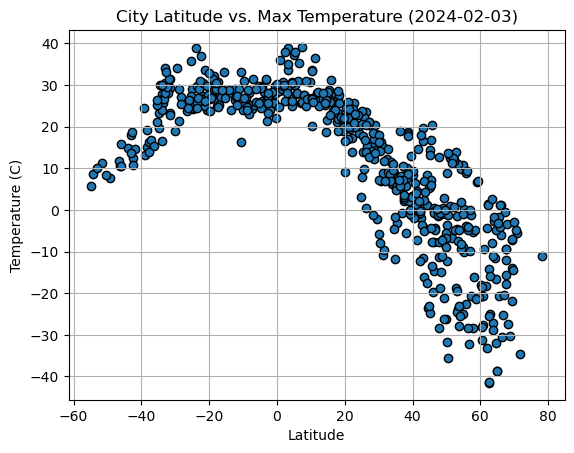

In [8]:
# Get date for graph title
Lat_Temp_date = city_data_df['Date'].unique()
Lat_Temp_date = Lat_Temp_date[0]

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp (C)']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({Lat_Temp_date})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/CityLat_v_MaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

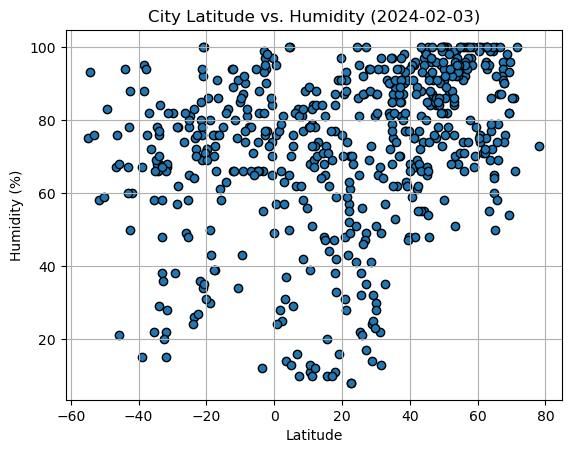

In [9]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity (%)']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({Lat_Temp_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/CityLat_v_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

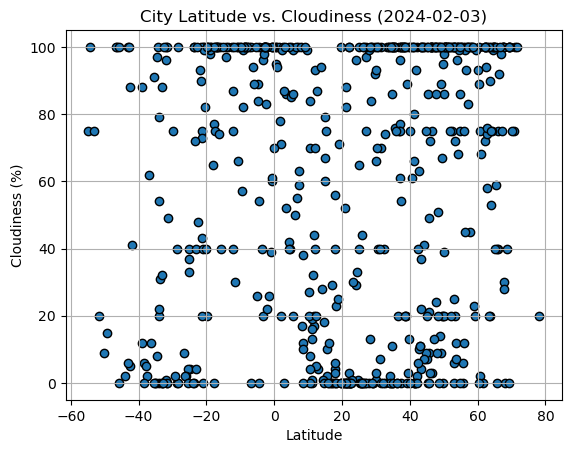

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness (%)']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({Lat_Temp_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/CityLat_v_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

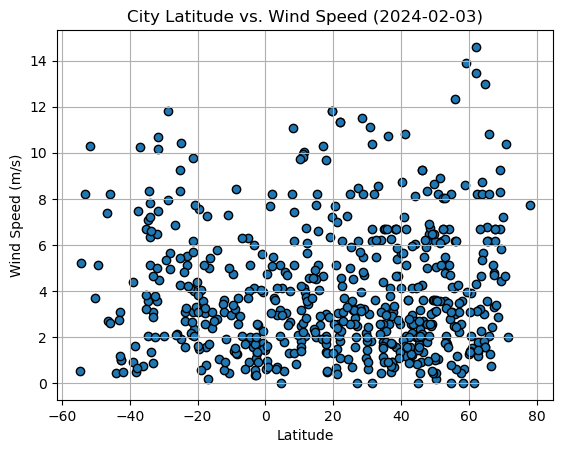

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed (m/s)']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({Lat_Temp_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/CityLat_v_WindSpeed.png")

# Show plot
plt.show()

## Compute Linear Regression for Each Relationship

In [55]:
# Define a function to create Linear Regression plots
def linear_reg(df_name, y_val_col):

    x_values = df_name['Lat']
    y_values = df_name[y_val_col]
    
    min_x = df_name['Lat'].min()
    max_y = df_name[y_val_col].max()

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_value = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
           
    print(' ')
    print(f"The r-value is: {rvalue}")
    
    plt.scatter(x_values,y_values)

    # Incorporate the other graph properties
    plt.title(f"City Latitude vs. {y_val_col} ({Lat_Temp_date})")
    plt.xlabel('Latitude')
    plt.ylabel(y_val_col)
    
    plt.plot(x_values, regression_value, "r-")
    plt.annotate(line_eq, (min_x,max_y), fontsize=12, color="red")
    
    plt.show()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,igarka,67.4667,86.5833,-11.93,96,100,4.78,RU,2024-02-03
2,wailua homesteads,22.0669,-159.3780,20.44,57,100,11.32,US,2024-02-03
4,altai,46.3722,96.2583,-14.58,96,100,1.35,MN,2024-02-03
5,vilyuchinsk,52.9306,158.4028,-18.75,84,6,4.78,RU,2024-02-03
7,pacific grove,36.6177,-121.9166,7.88,87,20,2.57,US,2024-02-03


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,15.12,95,6,0.46,AU,2024-02-03
3,waitangi,-43.9535,-176.5597,14.90,94,2,0.45,NZ,2024-02-03
6,puerto natales,-51.7236,-72.4875,11.25,58,20,10.29,CL,2024-02-03
10,carnarvon,-24.8667,113.6333,24.34,81,4,10.44,AU,2024-02-03
11,san pedro de lloc,-7.4328,-79.5058,24.35,78,100,2.92,PE,2024-02-03


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere
 
The r-value is: -0.8426830204812088


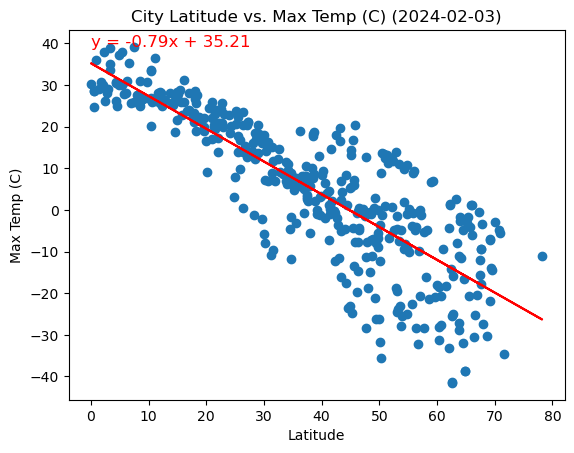

In [58]:
# Linear regression on Northern Hemisphere
print('Northern Hemisphere')
linear_reg(northern_hemi_df,"Max Temp (C)")

Southern Hemisphere
 
The r-value is: 0.568243552903646


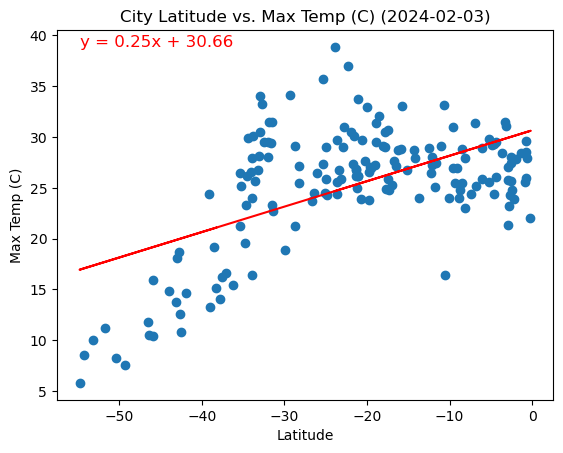

In [59]:
# Linear regression on Southern Hemisphere
print('Southern Hemisphere')
linear_reg(southern_hemi_df,"Max Temp (C)")

For the northern hemisphere, there is a relatively strong negative linear relationship between the city's latitude and the maximum temperature (C) as evidenced by a high r-value. This means that the higher the city's latitude, the colder it's maximum temperature is (for the date that the data was called - February 2024).

For the southern hemisphere, there is a weak linear association between city latitude and maximum temperature (C) as suggested with the mid range r-value and quite scattered data.

### Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere
 
The r-value is: 0.46235239624074


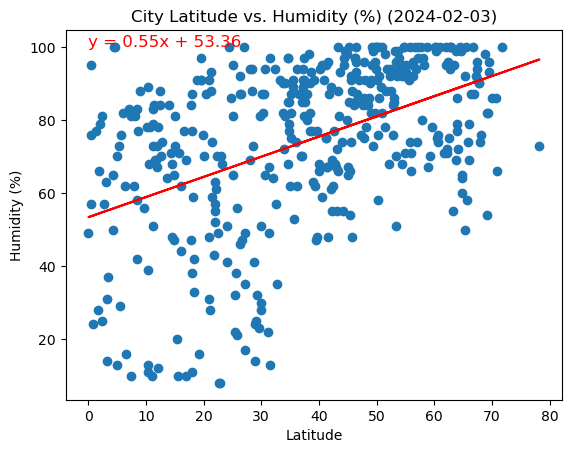

In [60]:
# Northern Hemisphere
print('Northern Hemisphere')
linear_reg(northern_hemi_df,"Humidity (%)")

Southern Hemisphere
 
The r-value is: 0.23124619001754904


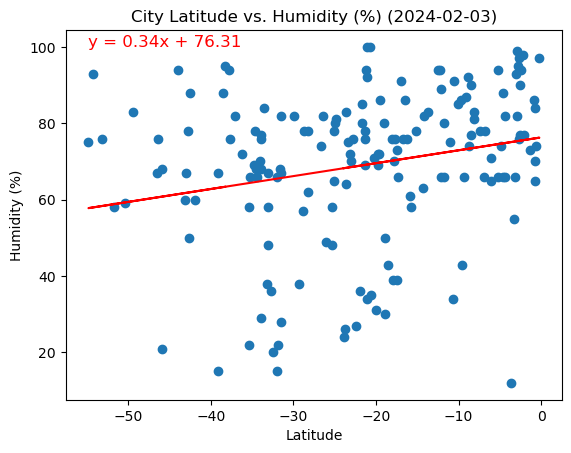

In [61]:
# Southern Hemisphere
print('Southern Hemisphere')
linear_reg(southern_hemi_df,"Humidity (%)")

For both the northern and southern hemisphere, there is a weak correlation between city latitude and humidity. The r-values are in the low-mid range values and the data is quite scattered in both plots. However, for both northern and southern hemispheres, the data points seem to be more concentrated at higher latitude and higher humidity. The scattered shape of the data seems to be like a right-upward facing triangle/arrow. This suggests that there is likely no linear relationship for lower latitudes in each hemisphere, however, it can be more confidently predicted that humidity increases at the higher latitudes of each hemisphere. Analysis valid for data pulled in February 2024.

### Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere
 
The r-value is: 0.24059379746427806


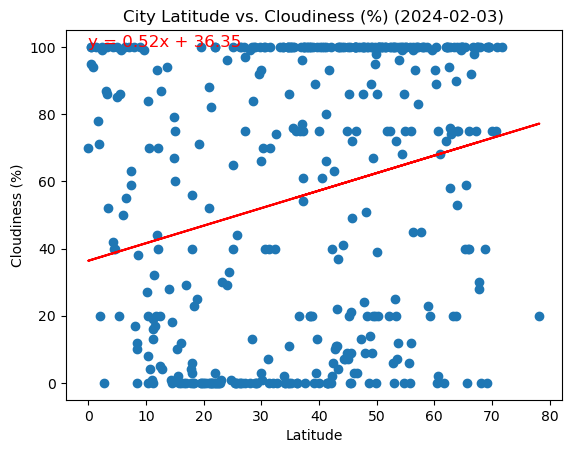

In [62]:
# Northern Hemisphere
print('Northern Hemisphere')
linear_reg(northern_hemi_df,"Cloudiness (%)")

Southern Hemisphere
 
The r-value is: 0.366543379751845


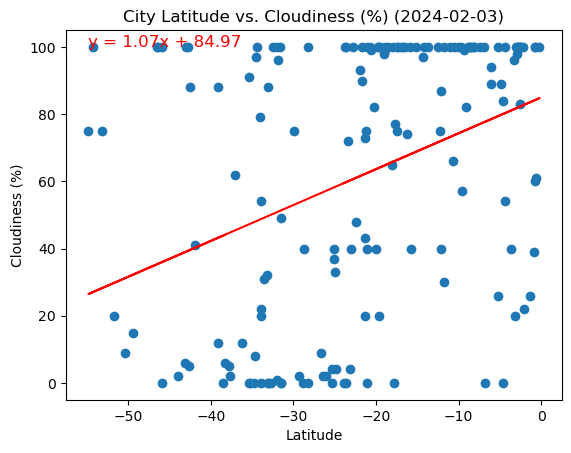

In [63]:
# Southern Hemisphere
print('Southern Hemisphere')
linear_reg(southern_hemi_df,"Cloudiness (%)")

There is a weak correlation between city latitude and cloudiness for both the northern and southern hemisphere. The r-values are in the low-mid range values and the data is very scattered for both plots. For the northern hemisphere, there are 2 concentrated areas of cloudiness at 0% and 100% across all latitudes with a lot of variability inbetween. However, for the southern hemisphere, a small concentration of data points can only be see at the mid-higher latitudes with high cloudiness (%). Analysis valid for data pulled in February 2024.

### Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere
 
The r-value is: 0.06542952742772473


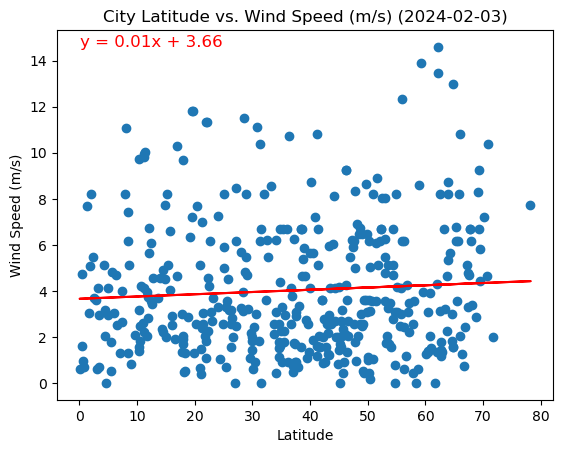

In [64]:
# Northern Hemisphere
print('Northern Hemisphere')
linear_reg(northern_hemi_df,"Wind Speed (m/s)")

Southern Hemisphere
 
The r-value is: -0.26620797639053745


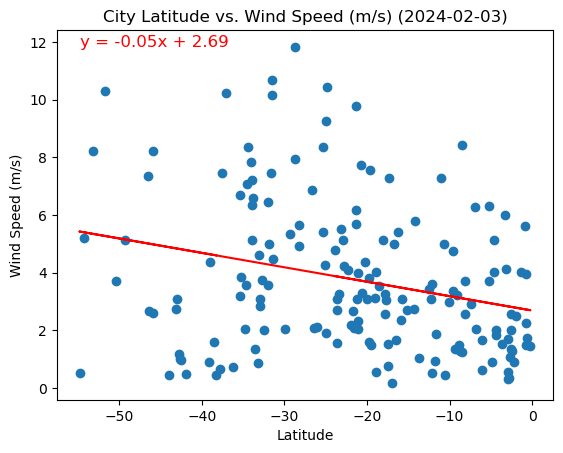

In [65]:
# Southern Hemisphere
print('Southern Hemisphere')
linear_reg(southern_hemi_df,"Wind Speed (m/s)")

For the northern hemisphere there is essentially no linear relationship between city latitude and wind speed as the r-value is very low and slope is close to 0. Overall, the data looks to be distributed quite evenly across latitudes in the northern hemisphere but only up wind speeds of approximately 10m/s, with a few outliers.

There is a very weak negative linear relationship between city latitude and wind speed in the northern hemisphere as evidenced by the low r-value and slope being close to 0. While data looks quite varied for latitude vs wind speed in the southern hemisphere, a slight concentration of data points can be seen for mid-higher latitudes and wind speeds below 4m/s.

Analysis valid for data pulled in February 2024.